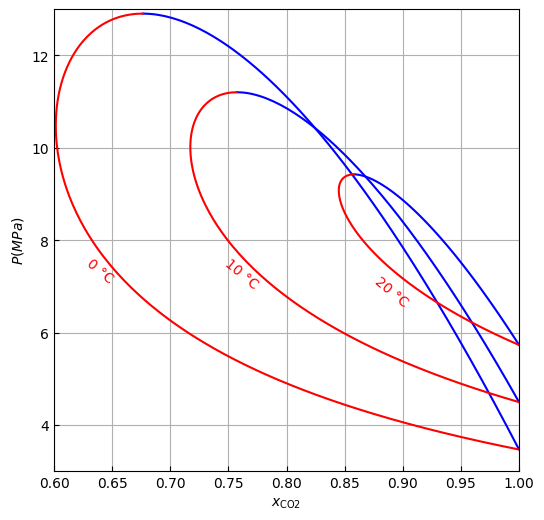

In [50]:
#!/usr/bin/python
# Modify system path
import sys
sys.path.insert(0,'../pycThermopack/')
# Importing pyThermopack
from thermopack.cubic import cubic
# Importing Numpy (math, arrays, etc...)
import numpy as np
# Importing Matplotlib (plotting)
import matplotlib.pyplot as plt

Temps = [273.15, 283.15, 293.15]

plt.figure(1,(6,6))

srk3 = cubic("CO2,N2", "PR")
for Temp in Temps:
    lle, l1ve, l2ve = srk3.get_binary_pxy(Temp, minimum_pressure=0, maximum_pressure=25e6)
    plt.plot(l1ve.x, l1ve.p*1e-6, color="b", ls= "-", label='_nolegend_')
    plt.plot(l1ve.y, l1ve.p*1e-6, color="r", ls="-",label='_nolegend_')
    

    a=6*len(l1ve.y)//10
    # Add text annotation for each plot
    plt.text(l1ve.y[a], l1ve.p[a]*1e-6-1.2, f'{int(Temp-273.15)} °C', fontsize=10, rotation = -40, color = 'r', fontweight = 500)

plt.xlim(0.6,1)
plt.ylim(3,13)

plt.grid()
plt.gca().xaxis.set_tick_params(direction='in')
plt.gca().yaxis.set_tick_params(direction='in')

plt.xlabel(r"$x_{\rm{CO2}}$")
plt.ylabel(r"$P (MPa)$")

plt.show()


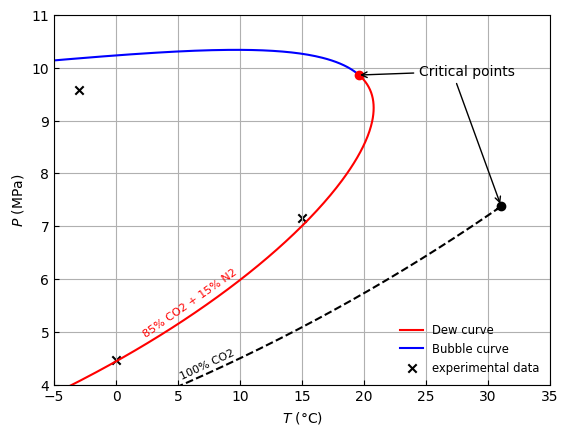

<Figure size 640x480 with 0 Axes>

In [319]:
#!/usr/bin/python
import sys
sys.path.insert(0,'../pycThermopack/')
import matplotlib.pyplot as plt
import numpy as np
from thermopack.tcPR import tcPR

tc_pr = tcPR("CO2,N2")

# Plot phase envelope
x = .85
z = np.array([x, 1-x])

T, P, v = tc_pr.get_envelope_twophase(1.0e4, z, maximum_pressure=1.5e7, minimum_temperature= 250, calc_v=True, step_size=.01)
Tc, vc, Pc = tc_pr.critical(z)

a=870
plt.plot(T[:a] - 273, P[:a]*1.0e-6, color='r', label = 'Dew curve')
plt.plot(T[a:] - 273, P[a:]*1.0e-6, color='b', label = 'Bubble curve')
plt.plot([Tc- 273], [Pc*1.0e-6], color='r', marker="o")


plt.scatter( 269.996-273,9.5824, color = 'black', marker= 'x')
plt.scatter( 288-273,7.15, color = 'black', marker= 'x', label = 'experimental data')
plt.scatter( 0,4.46, color = 'black', marker= 'x')


T1, P1, v1 = tc_pr.get_envelope_twophase(1.0e4, [1,0], maximum_pressure=1.5e7, calc_v=True)
Tc1, vc1, Pc1 = tc_pr.critical([1,0])
b=373
plt.plot(T1[:b]-273.15, P1[:b] * 1.0e-6, color='k',linestyle = '--')
plt.plot([Tc1-273.15], [Pc1 * 1.0e-6], "ko")




plt.text(2,4.9, f'85% CO2 + 15% N2', fontsize=8, rotation = 35, color = 'r')
plt.text(5,4.1, f'100% CO2', fontsize=8, rotation = 25, color = 'k')

# Add annotation with arrow
plt.annotate('Critical points', xy=(Tc-273.15, Pc * 1.0e-6), xytext=(Tc -273.15+ 5, Pc * 1.0e-6),arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('               ', xy=(Tc1-273.15, Pc1 * 1.0e-6), xytext=(Tc-273.15 + 5, Pc * 1.0e-6),arrowprops=dict(facecolor='black', arrowstyle='->'))


leg = plt.legend( loc = 'lower right',numpoints=1, frameon=False, fontsize = 'small')
plt.ylabel(r"$P$ (MPa)")
plt.xlabel(r"$T$ (°C)")

plt.xlim(-5, 35)
plt.ylim(4, 11)
plt.gca().xaxis.set_tick_params(direction='in')
plt.gca().yaxis.set_tick_params(direction='in')

plt.grid()
plt.show()
plt.clf()


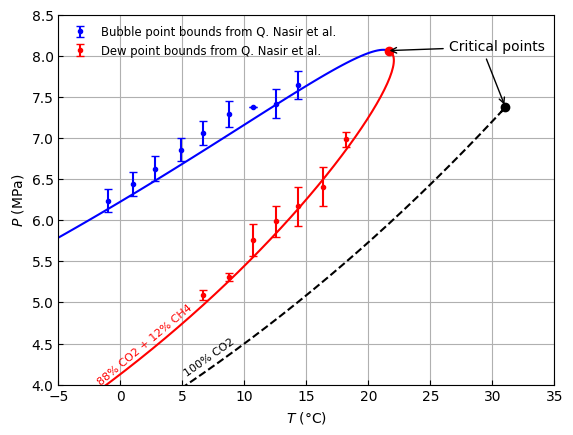

<Figure size 640x480 with 0 Axes>

In [320]:
import sys
sys.path.insert(0,'../pycThermopack/')
import matplotlib.pyplot as plt
import numpy as np
from thermopack.tcPR import tcPR

tc_pr = tcPR("CO2,C1")

eos = tc_pr

# Plot phase envelope
x = .88
z = np.array([x, 1-x])

T, P, v = eos.get_envelope_twophase(1.0e4, z, maximum_pressure=1.5e7, calc_v=True, step_size=.02, minimum_temperature=260)
Tc, vc, Pc = eos.critical(z)

a=388
plt.plot(T[:a] - 273, P[:a]*1.0e-6, color='r')
plt.plot(T[a:] - 273, P[a:]*1.0e-6, color='b')
plt.plot([Tc- 273], [Pc*1.0e-6], color='r', marker="o")

plt.ylabel(r"$P$ (MPa)")
plt.xlabel(r"$T$ (°C)")

# Bubble point
T = np.array([272.15, 274.15, 275.95, 278.05, 279.85, 281.90, 283.85, 285.70, 287.50, 289.50,291.35, 293.65])-273.15
lower_bound = np.array([6.1,6.3,6.48,6.72,6.92,7.14,7.38,7.24,7.48])
upper_bound = np.array([6.38,6.59,6.78,7,7.21,7.45,7.38,7.6,7.82])
plt.errorbar(T[:-3], (lower_bound+upper_bound)/2, yerr=[(upper_bound[i] - lower_bound[i])/2 for i in range(len(lower_bound))], fmt='.', color='blue', capsize=3, label='Bubble point bounds from Q. Nasir et al.') 
 

# Dew point
lower_bound = np.array([5.03,5.26,5.57,5.8,5.93,6.17,6.89])
upper_bound = np.array([5.15,5.36,5.95,6.18,6.41,6.65,7.08])
plt.errorbar(T[4:-1], (lower_bound+upper_bound)/2, yerr=[(upper_bound[i] - lower_bound[i])/2 for i in range(len(lower_bound))], fmt='.', color='red', capsize=3, label='Dew point bounds from Q. Nasir et al.') 


T1, P1, v1 = model.get_envelope_twophase(1.0e4, [1,0], maximum_pressure=1.5e7, calc_v=True)
Tc1, vc1, Pc1 = model.critical([1,0])
b=373
plt.plot(T1[:b]-273.15, P1[:b] * 1.0e-6, color='k',linestyle = '--')
plt.plot([Tc1-273.15], [Pc1 * 1.0e-6], "ko")



plt.annotate('Critical points', xy=(Tc-273.15, Pc * 1.0e-6), xytext=(Tc -273.15+ 5, Pc * 1.0e-6 ),arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('               ', xy=(Tc1-273.15, Pc1 * 1.0e-6), xytext=(Tc-273.15 + 5, Pc * 1.0e-6 ),arrowprops=dict(facecolor='black', arrowstyle='->'))




plt.text(-2,4, f'88% CO2 + 12% CH4', fontsize=8, rotation = 40, color = 'r')
plt.text(5,4.1, f'100% CO2', fontsize=8, rotation = 35, color = 'k')



plt.gca().xaxis.set_tick_params(direction='in')
plt.gca().yaxis.set_tick_params(direction='in')
plt.xlim(-5,35)
plt.ylim(4,8.5)
plt.grid()
plt.legend(loc="upper left", numpoints=1, frameon=False, fontsize='small')
plt.savefig('12%CH4.svg', format='svg')
plt.show()
plt.clf()

